# Library

In [71]:
# **Libraries for Data Handling**
import pandas as pd
import numpy as np
import random

# **Libraries for Visualization**
import matplotlib.pyplot as plt
import seaborn as sns

# **Libraries for Machine Learning**
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

# **Libraries for TensorFlow (Deep Learning)**
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Optional Libraries**
import warnings
warnings.filterwarnings('ignore')

# **Libraries for Model Serialization**
import pickle

In [72]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Generate dataset

In [73]:
# Membuat DataFrame baru yang berisi hasil pengolahan data
# df = pd.read_csv('https://drive.google.com/uc?id=1xLWDhb4_VTkDio-IVCSxHs5ozw-M1x2s')
# data = df.copy()
# data.head()

In [74]:
social_media_distribution = {
    "TikTok": 0.16,
    "Instagram": 0.18,
    "YouTube": 0.17,
    "Facebook": 0.15,
    "Threads": 0.12,
    "Reddit": 0.13,
    "X": 0.16
}

def generate_skewed_age(platform):
    age_distributions = {
        "TikTok": {"mean": 25, "std": 5, "min": 17, "max": 35},
        "Instagram": {"mean": 24, "std": 7, "min": 17, "max": 40},
        "YouTube": {"mean": 30, "std": 15, "min": 18, "max": 60},
        "Facebook": {"mean": 34, "std": 14, "min": 25, "max": 55},
        "Threads": {"mean": 21, "std": 8, "min": 20, "max":35},
        "Reddit": {"mean": 25, "std": 7, "min": 18, "max": 29},
        "X": {"mean": 23, "std": 9, "min": 17, "max": 40}
    }
    dist = age_distributions[platform]
    age = int(np.clip(np.random.normal(dist["mean"], dist["std"]), dist["min"], dist["max"]))
    return age

hours = [f"{hour:02}:00:00" for hour in range(24)]
columns = ["Age", "Social Media"] + hours + [
    "Concentrating Issues", "Bothered by Worries", "Feel Depressed",
    "Sleep Issues", "Compare to others"
]

def generate_usage_pattern_with_min_hours(app, age):
    usage_pattern = [0] * 24

    if app in ["TikTok", "Instagram"]:
        typical_hours = list(range(0, 24))
        num_active_hours = random.randint(5, 11)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    elif app == "YouTube":
        typical_hours = list(range(0, 2))+list(range(4, 24))
        num_active_hours = random.randint(4, 13)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    elif app == "Facebook":
        typical_hours = list(range(0, 1))+list(range(4, 23))
        num_active_hours = random.randint(4, 10)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    elif app == "Reddit":
        typical_hours = list(range(1, 2))+list(range(6, 22))
        num_active_hours = random.randint(6, 10)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    elif app == "Threads":
        typical_hours = list(range(1, 23))
        num_active_hours = random.randint(4, 9)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    elif app == "X":
        typical_hours = list(range(0, 24))
        num_active_hours = random.randint(4, 13)
        active_hours = random.sample(typical_hours, k=num_active_hours)

    for hour in active_hours:
        usage_pattern[hour] = 1

    return usage_pattern

def generate_realistic_mental_health_metrics(app, age, night_usage):
    if app in ["TikTok", "Instagram"]:
        issues = [
            random.randint(2, 5) if age < 25 else random.randint(1, 5),  # Concentrating Issues
            random.randint(2, 5) if age < 40 else random.randint(1, 5),  # Bothered by Worries
            random.randint(2, 5) if age < 23 else random.randint(1, 5),  # Feel Depressed
            random.randint(1, 5),  # Sleep Issues
            random.randint(2, 5) if age < 30 else random.randint(1, 5) if age > 40 else random.randint(2, 5)  # Compare to Others
        ]
    elif app == "YouTube":
        issues = [
            random.randint(1, 5) if age < 22 else random.randint(1, 4),  # Concentrating Issues
            random.randint(1, 5) if age < 30 else random.randint(1, 3),  # Bothered by Worries
            random.randint(1, 4),  # Feel Depressed
            random.randint(1, 5),  # Sleep Issues
            random.randint(1, 5)   # Compare to Others
        ]
    elif app == "Facebook":
        issues = [
            random.randint(1, 4) if age < 30 else random.randint(1, 5),  # Concentrating Issues
            random.randint(1, 4),  # Bothered by Worries
            random.randint(1, 5),  # Feel Depressed
            random.randint(2, 5),  # Sleep Issues
            random.randint(1, 5) if age < 32 else random.randint(2, 5)  # Compare to Others
        ]
    elif app == "Reddit":
        issues = [
            random.randint(2, 4) if age < 28 else random.randint(1, 4),  # Concentrating Issues
            random.randint(2, 5) if age < 30 else random.randint(2, 4),  # Bothered by Worries
            random.randint(1, 3),  # Feel Depressed
            random.randint(1, 5) if age < 31 else random.randint(1, 4),  # Sleep Issues
            random.randint(1, 4)   # Compare to Others
        ]
    elif app == "Threads":
        issues = [
            random.randint(1, 5),  # Concentrating Issues
            random.randint(1, 4),  # Bothered by Worries
            random.randint(1, 4),  # Feel Depressed
            random.randint(1, 5),  # Sleep Issues
            random.randint(1, 4)   # Compare to Others
        ]
    elif app == "X":
        issues = [
            random.randint(2, 5) if age < 27 else random.randint(1, 5),  # Concentrating Issues
            random.randint(2, 4),  # Bothered by Worries
            random.randint(1, 5) if age < 35 else random.randint(1, 5),  # Feel Depressed
            random.randint(1, 5),  # Sleep Issues
            random.randint(2, 5) if age < 34 else random.randint(1, 5)  # Compare to Others
        ]

    if night_usage > 4:
        issues[3] = min(issues[3] + 2, 5)
        issues[1] = min(issues[1] + 1, 5)
    elif night_usage > 2:
        issues[3] = min(issues[3] + 1, 5)
        issues[1] = min(issues[1] + 1, 5)

    if 2 < night_usage <= 4:
        issues[0] = max(issues[0] - 1, 1)

    return issues

In [75]:
def determine_output(row):

    productive_hours = ['09:00:00', '10:00:00', '11:00:00', '14:00:00', '15:00:00', '16:00:00']
    sleeping_hours = ['00:00:00', '01:00:00', '02:00:00', '03:00:00', '22:00:00', '23:00:00']
    age = row['Age']
    total_usage_productive = sum([row[time] for time in productive_hours])
    total_usage_sleeping = sum([row[time] for time in sleeping_hours])

    if (age > 35 and (total_usage_productive > 4 or total_usage_sleeping > 3)) or (age <= 35 and (total_usage_productive > 2 or total_usage_sleeping > 2)):
        return 1
    if age < 21:
        if (row['Concentrating Issues'] > 2 or
            row['Bothered by Worries'] > 3 or
            row['Feel Depressed'] > 2 or
            row['Sleep Issues'] > 2 or
            row['Compare to others'] > 2):
            return 1
    elif age < 35:
        if (row['Concentrating Issues'] > 2 or
            row['Bothered by Worries'] > 4 or
            row['Feel Depressed'] > 2 or
            row['Sleep Issues'] > 3 or
            row['Compare to others'] > 3):
            return 1
    total_usage_daily = sum([row[time] for time in [f"{hour:02}:00:00" for hour in range(24)]])
    if total_usage_daily > 9:
        return 1
    return 0

# Dataset

In [76]:
data = []
for _ in range(6000):
    app = random.choices(list(social_media_distribution.keys()), weights=social_media_distribution.values())[0]
    age = generate_skewed_age(app)
    usage_pattern = generate_usage_pattern_with_min_hours(app, age)
    night_usage = sum(usage_pattern[23:24] + usage_pattern[0:4])
    mental_health_metrics = generate_realistic_mental_health_metrics(app, age, night_usage)
    row = [age, app] + usage_pattern + mental_health_metrics
    data.append(row)

df = pd.DataFrame(data, columns=columns)
data = df.copy()
data = data.join(pd.get_dummies(data['Social Media']).astype(int))
data.drop('Social Media', axis=1, inplace=True)

data.head()


,Age,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,Feel Depressed,Sleep Issues,Compare to others,Facebook,Instagram,Reddit,Threads,TikTok,X,YouTube
0,28,0,0,0,0,0,0,1,1,0,...,2,2,3,0,0,1,0,0,0,0
1,20,0,0,0,1,0,0,0,0,0,...,3,5,4,0,0,0,1,0,0,0
2,30,0,0,0,0,0,0,1,0,0,...,3,2,5,0,0,0,0,0,0,1
3,17,0,0,0,0,0,0,0,0,0,...,5,4,3,0,0,0,0,0,1,0
4,17,0,0,0,0,0,0,1,0,0,...,1,2,4,0,0,0,0,0,1,0


In [77]:
data['Target'] = data.apply(determine_output, axis=1)
print(data['Target'].value_counts(normalize=True))

Target
1    0.873333
0    0.126667
Name: proportion, dtype: float64


# Exploratory data analysis

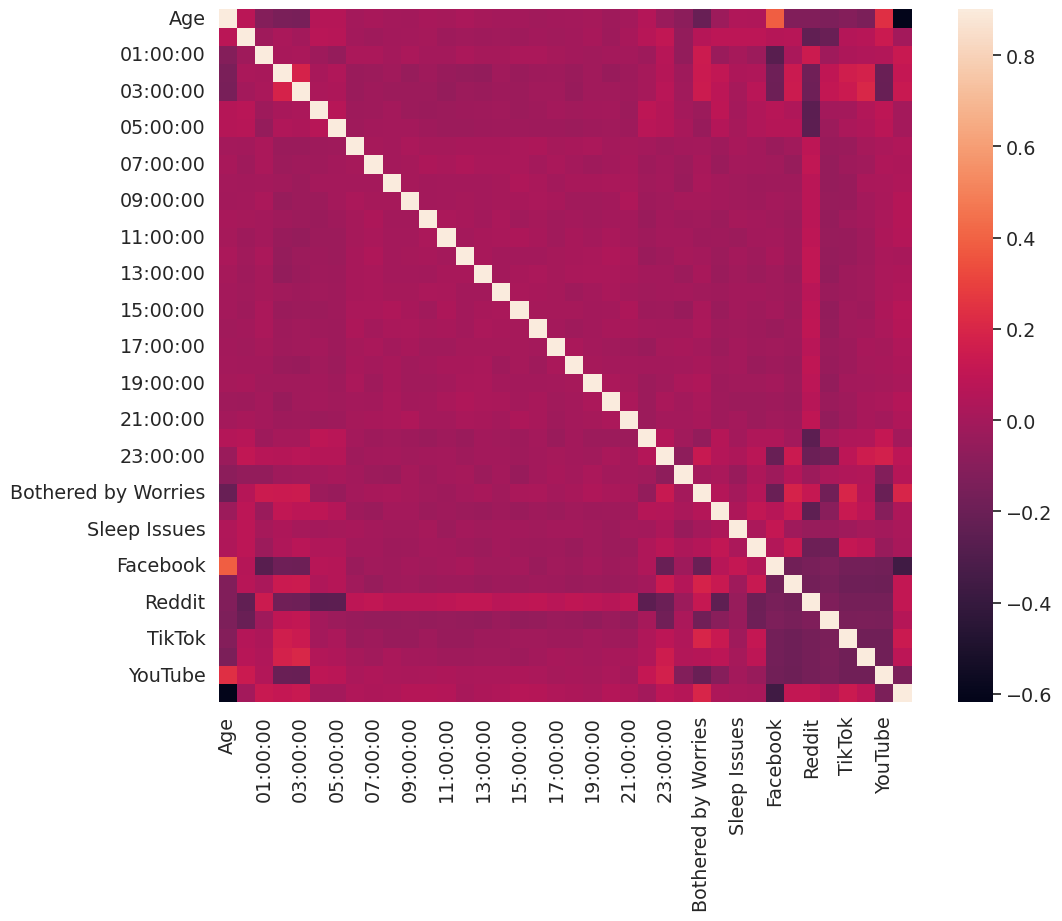

In [78]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);
plt.show()

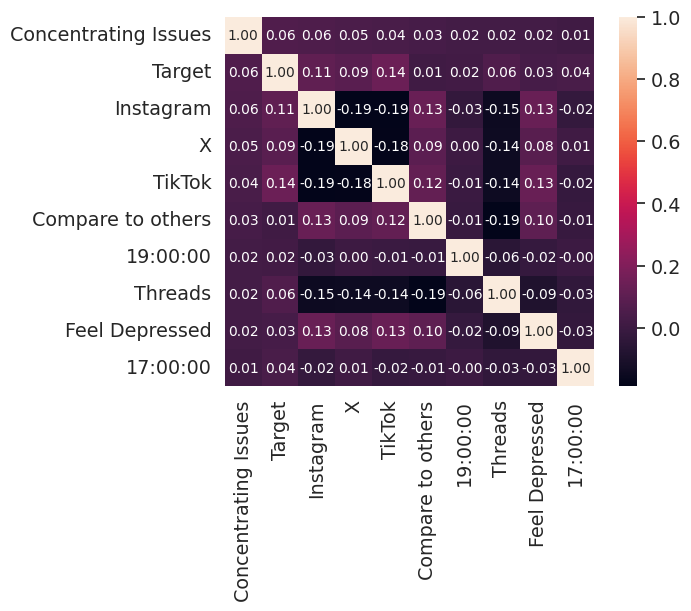

In [79]:
k = 10
cols = corrmat.nlargest(k, 'Concentrating Issues')['Concentrating Issues'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

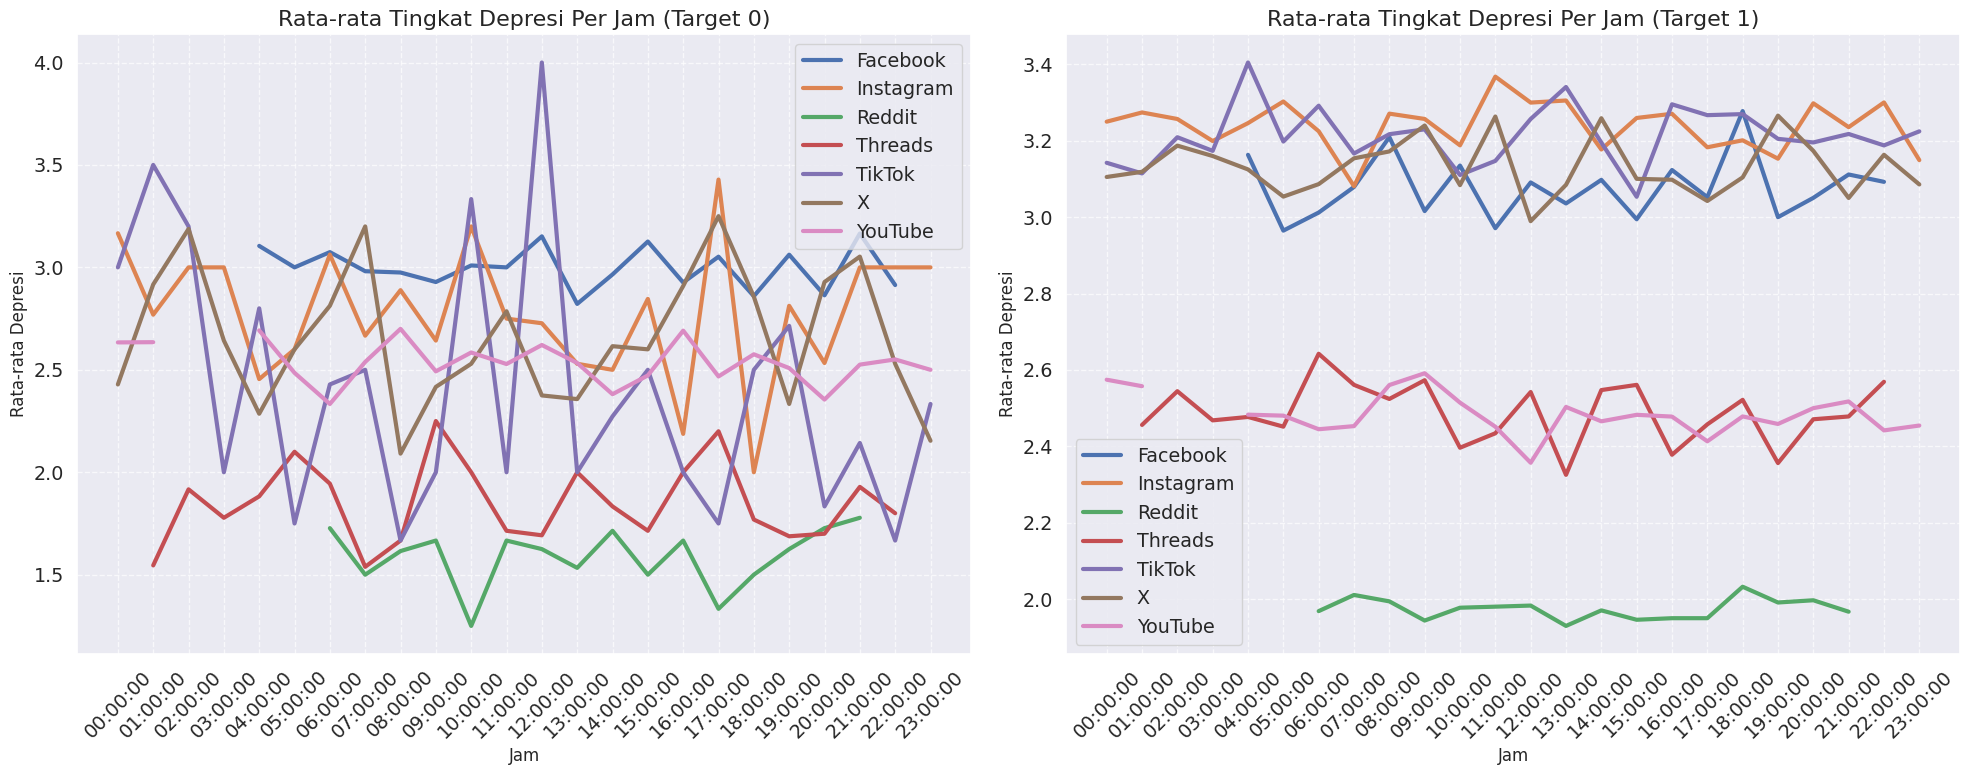

In [80]:
apps = ['Facebook', 'Instagram', 'Reddit', 'Threads', 'TikTok', 'X', 'YouTube']
hour_cols = [f"{i:02d}:00:00" for i in range(24)]
mood_cols = ['Concentrating Issues', 'Bothered by Worries', 'Feel Depressed', 'Sleep Issues', 'Compare to others']
hourly_distribution = pd.DataFrame(index=hour_cols)
for app in apps:
    app_usage = data[data[app] == 1][hour_cols].sum()
    hourly_distribution[app] = app_usage

data_target_0 = data[data['Target'] == 0]
data_target_1 = data[data['Target'] == 1]

average_mood_target_0 = {}
average_mood_target_1 = {}

for app in apps:
    mood_per_hour_0 = []
    mood_per_hour_1 = []

    for hour in hour_cols:
        mood_avg_0 = data_target_0[(data_target_0[app] == 1) & (data_target_0[hour] == 1)][mood_cols].mean()
        mood_avg_1 = data_target_1[(data_target_1[app] == 1) & (data_target_1[hour] == 1)][mood_cols].mean()

        mood_per_hour_0.append(mood_avg_0)
        mood_per_hour_1.append(mood_avg_1)

    average_mood_target_0[app] = pd.DataFrame(mood_per_hour_0, index=hour_cols)
    average_mood_target_1[app] = pd.DataFrame(mood_per_hour_1, index=hour_cols)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for app, df in average_mood_target_0.items():
    axes[0].plot(df.index, df['Feel Depressed'], label=app, linewidth=3)
axes[0].set_title("Rata-rata Tingkat Depresi Per Jam (Target 0)", fontsize=16)
axes[0].set_xlabel("Jam", fontsize=12)
axes[0].set_ylabel("Rata-rata Depresi", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

for app, df in average_mood_target_1.items():
    axes[1].plot(df.index, df['Feel Depressed'], label=app, linewidth=3)
axes[1].set_title("Rata-rata Tingkat Depresi Per Jam (Target 1)", fontsize=16)
axes[1].set_xlabel("Jam", fontsize=12)
axes[1].set_ylabel("Rata-rata Depresi", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

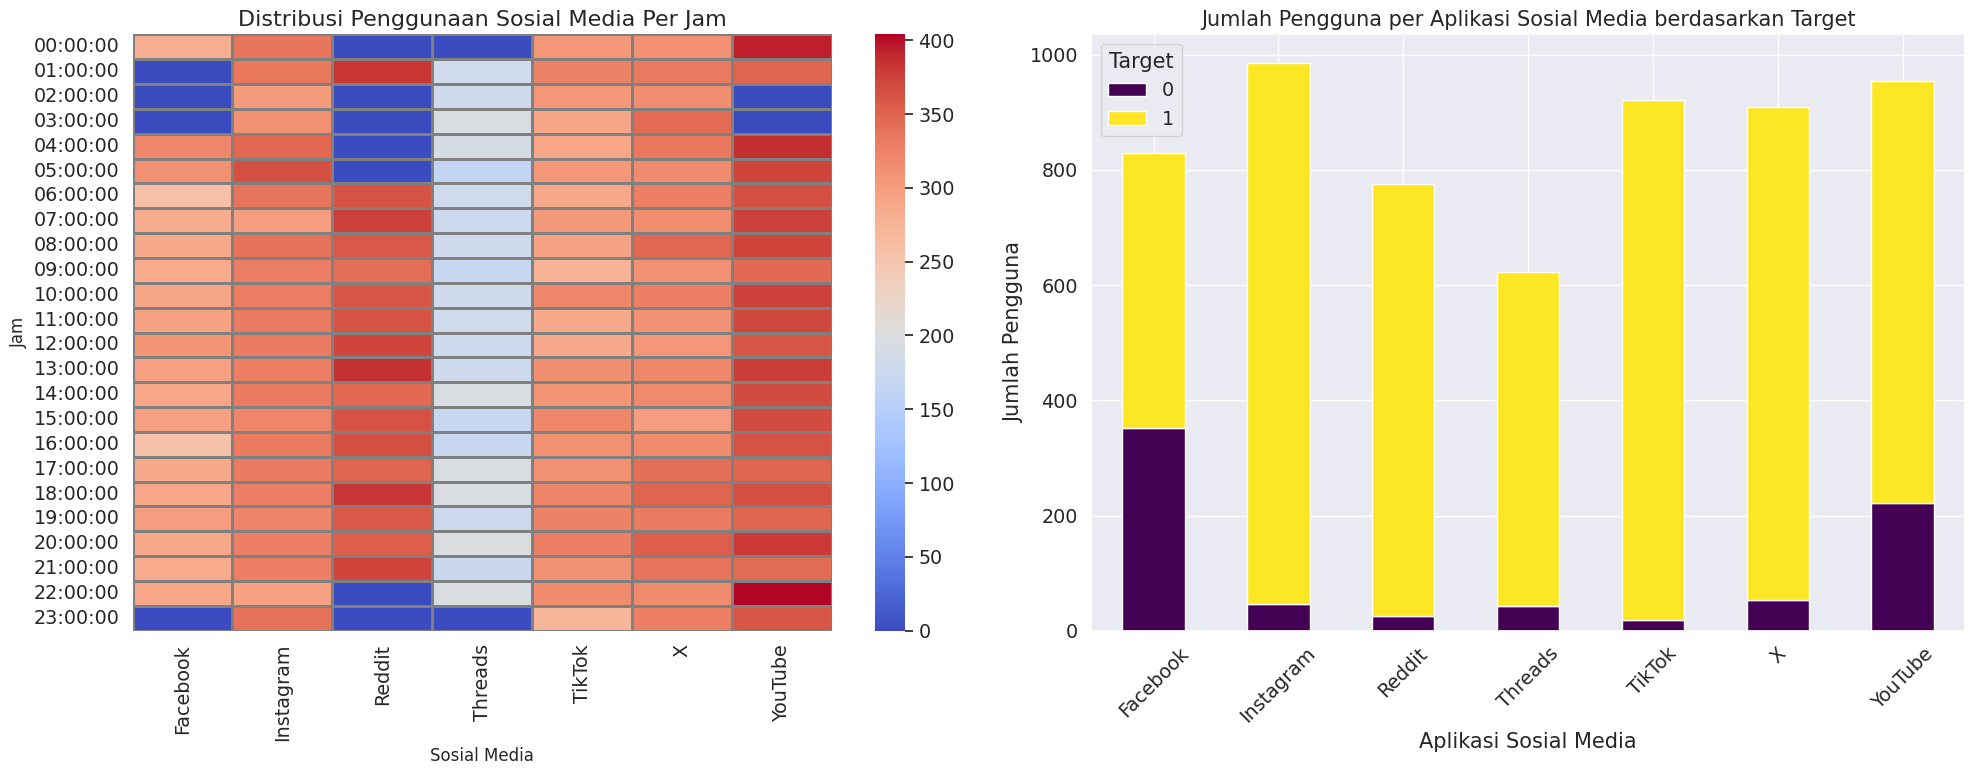

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(hourly_distribution, annot=False, cmap='coolwarm', cbar=True, linewidths=1, linecolor='gray', ax=axes[0])
axes[0].set_title("Distribusi Penggunaan Sosial Media Per Jam", fontsize=16)
axes[0].set_xlabel("Sosial Media", fontsize=12)
axes[0].set_ylabel("Jam", fontsize=12)

app_usage_target = data.groupby('Target')[apps].sum().T

app_usage_target.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Jumlah Pengguna per Aplikasi Sosial Media berdasarkan Target')
axes[1].set_xlabel('Aplikasi Sosial Media')
axes[1].set_ylabel('Jumlah Pengguna')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


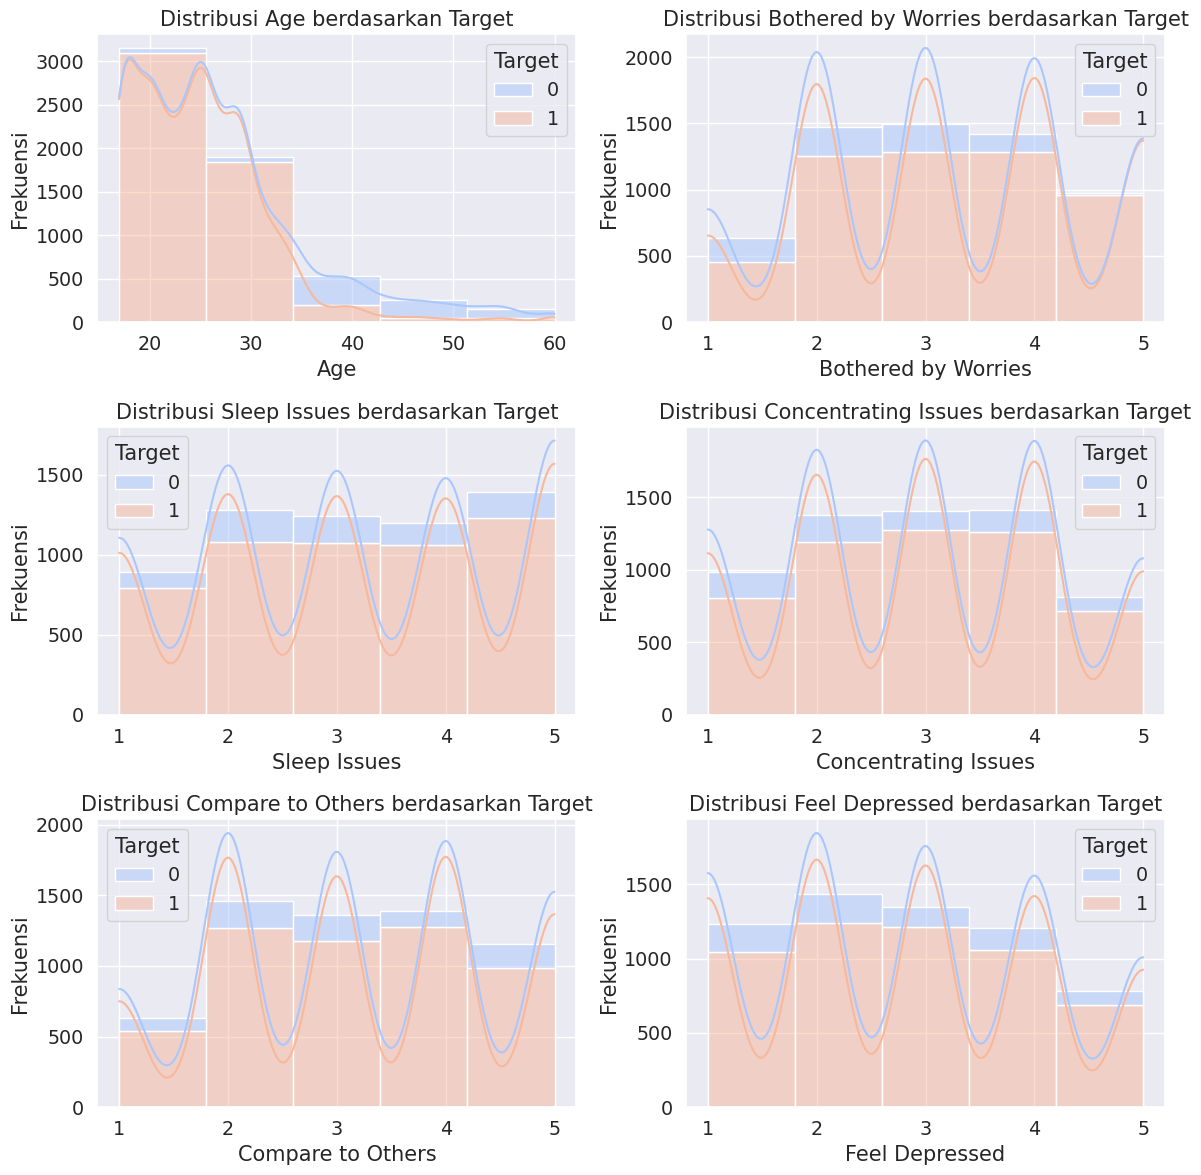

In [82]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# 1. Distribusi Usia dengan Target
sns.histplot(data=data, x='Age', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Age berdasarkan Target')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frekuensi')

# 2. Distribusi Usia dengan Target
sns.histplot(data=data, x='Bothered by Worries', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Bothered by Worries berdasarkan Target')
axes[0, 1].set_xlabel('Bothered by Worries')
axes[0, 1].set_ylabel('Frekuensi')

# 3. Distribusi Sleep Issues dengan Target
sns.histplot(data=data, x='Sleep Issues', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Sleep Issues berdasarkan Target')
axes[1, 0].set_xlabel('Sleep Issues')
axes[1, 0].set_ylabel('Frekuensi')

# 4. Distribusi Concentrating Issues dengan Target
sns.histplot(data=data, x='Concentrating Issues', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Concentrating Issues berdasarkan Target')
axes[1, 1].set_xlabel('Concentrating Issues')
axes[1, 1].set_ylabel('Frekuensi')

# 5. Distribusi Compare to Others dengan Target
sns.histplot(data=data, x='Compare to others', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[2, 0])
axes[2, 0].set_title('Distribusi Compare to Others berdasarkan Target')
axes[2, 0].set_xlabel('Compare to Others')
axes[2, 0].set_ylabel('Frekuensi')

# 6. Distribusi Feel Depressed dengan Target
sns.histplot(data=data, x='Feel Depressed', bins=5, kde=True, hue='Target', multiple='stack', palette="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Feel Depressed berdasarkan Target')
axes[2, 1].set_xlabel('Feel Depressed')
axes[2, 1].set_ylabel('Frekuensi')

# Menyesuaikan layout subplots
plt.tight_layout()
plt.show()


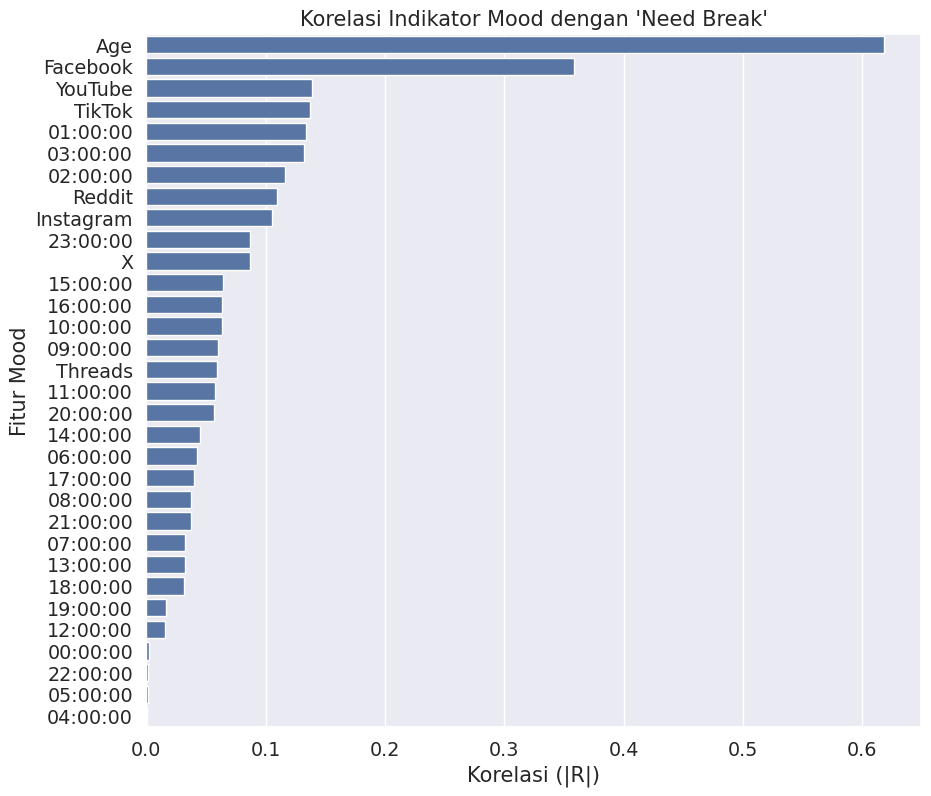

In [83]:
features = ['Age', 'Facebook', 'Instagram', 'Reddit', 'Threads', 'TikTok', 'X', 'YouTube'] + \
           [f"{i:02d}:00:00" for i in range(24)]

correlations = data[features + ['Target']].corr()['Target'][:-1]
correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Korelasi Indikator Mood dengan 'Need Break'")
plt.xlabel("Korelasi (|R|)")
plt.ylabel("Fitur Mood")
plt.show()

# Traditional ML

In [84]:
features = ['Age'] + apps + hour_cols
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Model Random Forest
model_rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict, n_estimators=100, max_depth=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Model Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Accuracy Random Forest: 0.9541666666666667
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       150
           1       0.97      0.98      0.97      1050

    accuracy                           0.95      1200
   macro avg       0.90      0.88      0.89      1200
weighted avg       0.95      0.95      0.95      1200

[[ 118   32]
 [  23 1027]]
Accuracy Logistic Regression: 0.9416666666666667
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       150
           1       0.95      0.98      0.97      1050

    accuracy                           0.94      1200
   macro avg       0.90      0.82      0.85      1200
weighted avg       0.94      0.94      0.94      1200

[[  98   52]
 [  18 1032]]


# Artificial Neural Network

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

class_weight_dict = {0: 3, 1: 0.5560382276281495}

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    class_weight=class_weight_dict
)

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6429 - loss: 1.6821 - val_accuracy: 0.8683 - val_loss: 1.2906
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8627 - loss: 1.1410 - val_accuracy: 0.9106 - val_loss: 0.9623
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.9128 - val_accuracy: 0.9268 - val_loss: 0.7513
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.7503 - val_accuracy: 0.9220 - val_loss: 0.5952
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9069 - loss: 0.6283 - val_accuracy: 0.9268 - val_loss: 0.4946
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8939 - loss: 0.5466 - val_accuracy: 0.9333 - val_loss: 0.4421
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9029 - loss: 0.4907 - val_accuracy: 0.9220 - val_loss: 0.4352
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8986 - loss: 0.4318 - val_accuracy: 0.9154 - 

In [105]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,052 (39.27 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 4,931 (19.27 KB)

# Evaluation

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Optimal Threshold: 0.7584781646728516


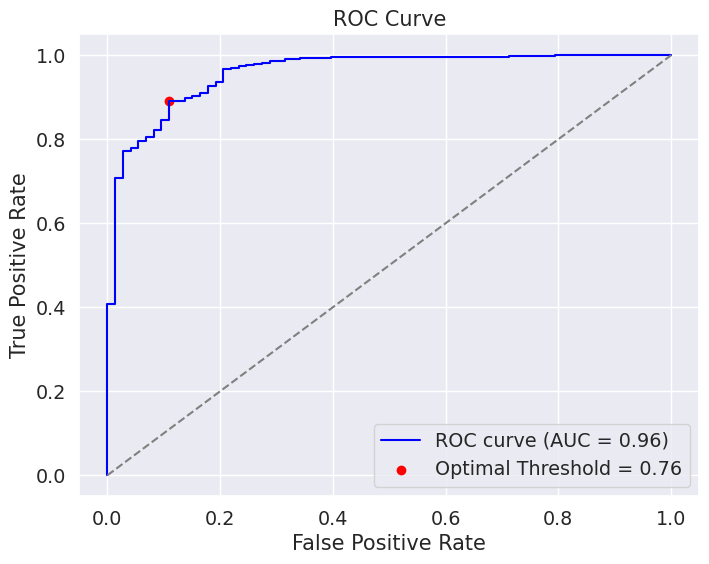

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.2895 
              precision    recall  f1-score   support

           0       0.52      0.89      0.66        73
           1       0.98      0.89      0.93       542

    accuracy                           0.89       615
   macro avg       0.75      0.89      0.80       615
weighted avg       0.93      0.89      0.90       615

tf.Tensor(
[[ 65   8]
 [ 60 482]], shape=(2, 2), dtype=int32)


In [106]:
y_pred = model.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred > optimal_threshold).astype(int)
print(f"Optimal Threshold: {optimal_threshold}")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis acak
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

model.evaluate(X_val, y_val)
print(classification_report(y_val,y_pred))
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_pred)
print(cm)

In [107]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print(f"Precision (Training): {precision:.4f}")
print(f"Recall (Training): {recall:.4f}")
print(f"F1 Score (Training): {f1:.4f}")

y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Precision (Validation): {precision:.4f}")
print(f"Recall (Validation): {recall:.4f}")
print(f"F1 Score (Validation): {f1:.4f}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision (Training): 0.9807
Recall (Training): 0.9469
F1 Score (Training): 0.9635
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Precision (Validation): 0.9715
Recall (Validation): 0.9428
F1 Score (Validation): 0.9569


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


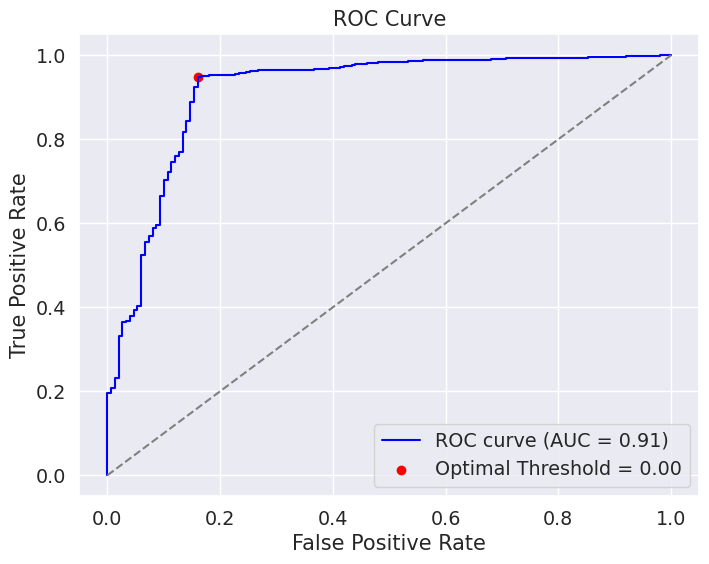

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       150
           1       0.98      0.95      0.96      1050

    accuracy                           0.94      1200
   macro avg       0.84      0.89      0.86      1200
weighted avg       0.94      0.94      0.94      1200

Confusion Matrix:
[[126  24]
 [ 54 996]]


In [108]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred >= optimal_threshold).astype(int)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis acak
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


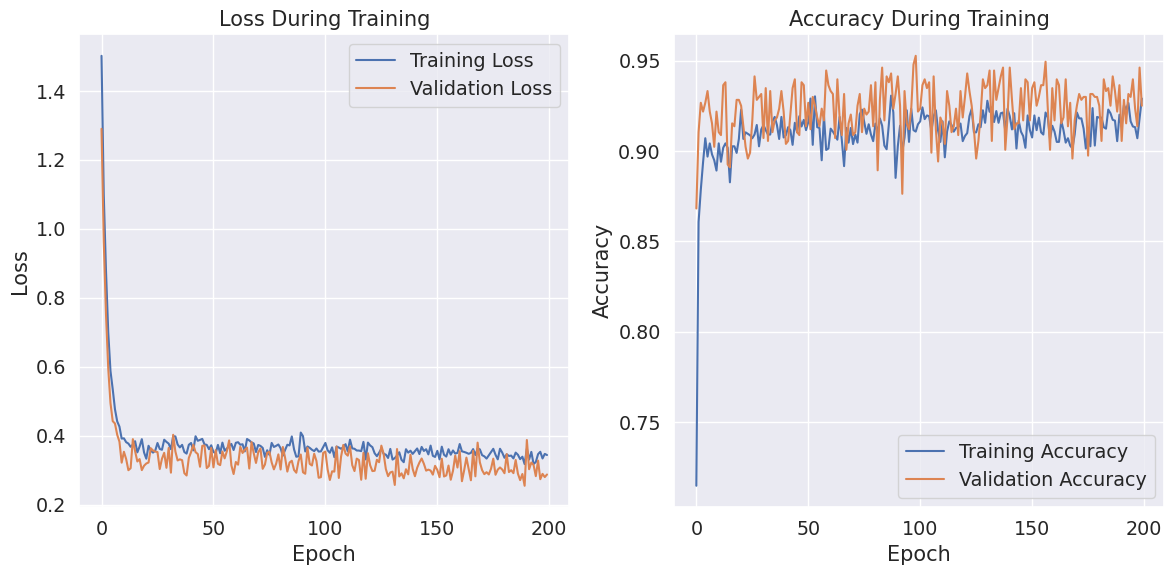

In [109]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Save model

In [110]:
model.save('neural_network_model.h5')

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [111]:
loaded_model = tf.keras.models.load_model('neural_network_model.h5')

with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [112]:
def predict_new_data(input_data):

    new_data_scaled = scaler.transform(input_data)

    prediction = loaded_model.predict(new_data_scaled)
    prediction = (prediction > 0.5).astype(int)

    return prediction[0][0]

input_data = pd.DataFrame({
    'Age': [25],
    'Facebook': [1],
    'Instagram':[0],
    'Reddit':   [0],
    'Threads':  [0],
    'TikTok':   [0],
    'X':        [0],
    'YouTube':  [0],
    '00:00:00': [1],
    '01:00:00': [1],
    '02:00:00': [0],
    '03:00:00': [0],
    '04:00:00': [0],
    '05:00:00': [0],
    '06:00:00': [1],
    '07:00:00': [0],
    '08:00:00': [1],
    '09:00:00': [1],
    '10:00:00': [0],
    '11:00:00': [1],
    '12:00:00': [0],
    '13:00:00': [0],
    '14:00:00': [0],
    '15:00:00': [0],
    '16:00:00': [0],
    '17:00:00': [1],
    '18:00:00': [1],
    '19:00:00': [0],
    '20:00:00': [0],
    '21:00:00': [0],
    '22:00:00': [0],
    '23:00:00': [0]
})
predicted_nn = predict_new_data(input_data)
print(f"Pengguna {'perlu waktu istirahat!' if predicted_nn == 1 else 'tidak perlu waktu istirahat.'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Pengguna tidak perlu waktu istirahat.
